In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
# Read the parquet file for January 2023 yellow taxi trip data into a DataFrame
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

# Read the parquet file for February 2023 yellow taxi trip data into a DataFrame
val_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [4]:
# Display the first 5 rows of the DataFrame 'df'
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
# Display the first 5 rows of the DataFrame 'val_df'
val_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [6]:
# Get the number of columns in the DataFrame 'df'
df.shape[1]

19

In [7]:
# Calculate the trip duration for each ride
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
val_df['trip_duration'] = val_df['tpep_dropoff_datetime'] - val_df['tpep_pickup_datetime']


In [8]:
# Display the first 5 rows of the DataFrame 'df'
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [9]:
# Display the first 5 rows of the DataFrame 'val_df'
val_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00,0 days 00:01:41
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00,0 days 00:00:14
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00,0 days 00:00:14
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25,0 days 00:32:05
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00,0 days 00:13:18


In [10]:
# Calculate the standard deviation of the 'trip_duration' column in the 'df' DataFrame
std_duration = df['trip_duration'].std()

print(f"Standard Deviation of Trip Duration: {std_duration}")


Standard Deviation of Trip Duration: 0 days 00:42:35.661074


In [11]:
#convert trip duration into minutes 
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60
print(df['trip_duration_minutes'].describe())
val_df['trip_duration_minutes'] = val_df['trip_duration'].dt.total_seconds() / 60
print(val_df['trip_duration_minutes'].describe())




count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: trip_duration_minutes, dtype: float64
count    2.913955e+06
mean     1.601591e+01
std      4.284210e+01
min     -4.361667e+01
25%      7.250000e+00
50%      1.180000e+01
75%      1.876667e+01
max      7.053617e+03
Name: trip_duration_minutes, dtype: float64


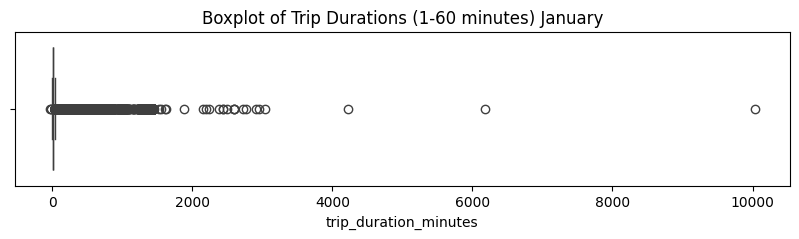

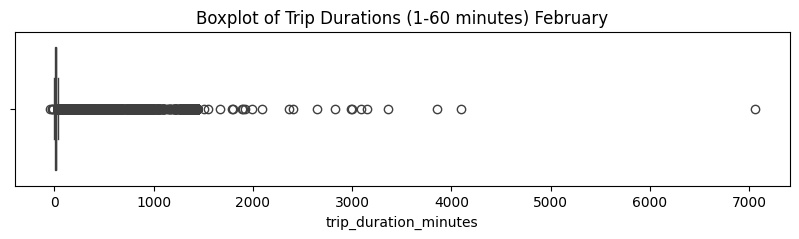

In [12]:
# Create a boxplot for the data
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['trip_duration_minutes'])
plt.title('Boxplot of Trip Durations (1-60 minutes) January')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=val_df['trip_duration_minutes'])
plt.title('Boxplot of Trip Durations (1-60 minutes) February')
plt.show()


In [13]:

# Filter the data to keep only durations between 1 and 60 minutes (inclusive)
filtered_df = df[(df['trip_duration_minutes'] >= 1) & (df['trip_duration_minutes'] <= 60)]
# Display the filtered DataFrame
print(filtered_df['trip_duration_minutes'].describe())
filtered_df.head()

count    3.009173e+06
mean     1.420486e+01
std      9.939386e+00
min      1.000000e+00
25%      7.216667e+00
50%      1.155000e+01
75%      1.818333e+01
max      6.000000e+01
Name: trip_duration_minutes, dtype: float64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_duration_minutes
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333


In [14]:
# Filter the data to keep only durations between 1 and 60 minutes (inclusive)
val_filtered_df = val_df[(val_df['trip_duration_minutes'] >= 1) & (val_df['trip_duration_minutes'] <= 60)]
# Display the filtered DataFrame
print(val_filtered_df['trip_duration_minutes'].describe())
val_filtered_df.head()

count    2.855951e+06
mean     1.446811e+01
std      1.006423e+01
min      1.000000e+00
25%      7.366667e+00
50%      1.181667e+01
75%      1.860000e+01
max      6.000000e+01
Name: trip_duration_minutes, dtype: float64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration,trip_duration_minutes
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,...,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,0 days 00:01:41,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,...,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,0 days 00:32:05,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,...,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,0 days 00:13:18,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,...,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,0 days 00:14:38,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,...,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,0 days 00:27:57,27.950000


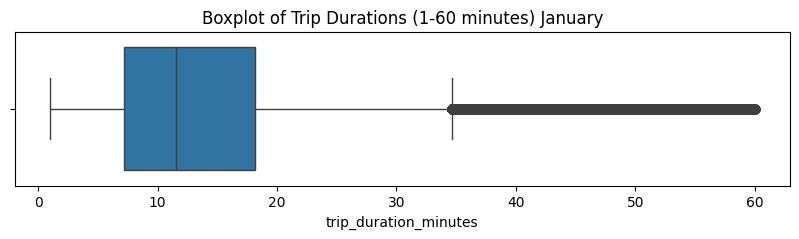

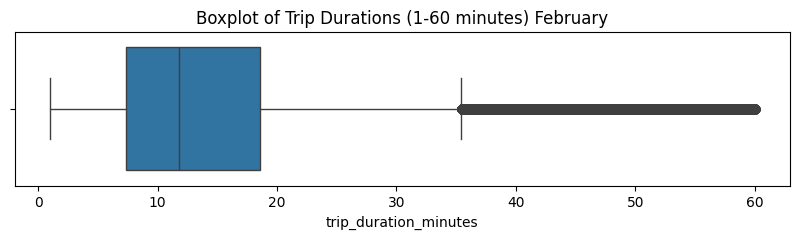

In [15]:
# Create a boxplot for the filtered data
plt.figure(figsize=(10, 2))
sns.boxplot(x=filtered_df['trip_duration_minutes'])
plt.title('Boxplot of Trip Durations (1-60 minutes) January')
plt.show()

# Create a boxplot for the filtered data
plt.figure(figsize=(10, 2))
sns.boxplot(x=val_filtered_df['trip_duration_minutes'])
plt.title('Boxplot of Trip Durations (1-60 minutes) February')
plt.show()

In [16]:
# Total number of records before filtering
total_records = len(df)

# Total number of records after filtering
filtered_records = len(filtered_df)

# Fraction of records retained
fraction_retained = filtered_records / total_records

print(f"Fraction of records retained: {fraction_retained:.4f} ({filtered_records} out of {total_records})")

Fraction of records retained: 0.9812 (3009173 out of 3066766)


In [17]:
dicts = filtered_df[['PULocationID', 'DOLocationID']].to_dict(orient='records')
for d in dicts:
    d['PULocationID'] = str(d['PULocationID'])
    d['DOLocationID'] = str(d['DOLocationID'])

    # Fit the DictVectorizer
dv = DictVectorizer()
dv.fit(dicts)

# Transform the data to get the feature matrix
X = dv.transform(dicts)

# Get the dimensionality (number of columns)
print(f"Dimensionality of the matrix: {X.shape[1]}")
    

: 

In [ ]:
v_dicts = val_filtered_df[['PULocationID', 'DOLocationID']].to_dict(orient='records')
for d in dicts:
    d['PULocationID'] = str(d['PULocationID'])
    d['DOLocationID'] = str(d['DOLocationID'])

    # Fit the DictVectorizer
v_dv = DictVectorizer()
v_dv.fit(dicts)

# Transform the data to get the feature matrix
v_X = dv.transform(dicts)

# Get the dimensionality (number of columns)
print(f"Dimensionality of the matrix: {v_X.shape[1]}")
    

In [ ]:
# Get the target variable (duration)
y = filtered_df['trip_duration_minutes'].values
# Train a linear regression model with default parameters
model = LinearRegression()
model.fit(X, y)



In [ ]:
# Make predictions on the training data
y_pred = model.predict(X)

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE on training data: {rmse:.4f}")

In [ ]:
val_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [ ]:
val_df.head()

In [ ]:
val_dicts = val_df[['PULocationID', 'DOLocationID']].to_dict(orient='records')
for d in val_dicts:
    d['PULocationID'] = str(d['PULocationID'])
    d['DOLocationID'] = str(d['DOLocationID'])